# Import

In [1]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("data/train.csv")

In [2]:
df_train.head()

,IMO,NAME,TYPE,BUILD_YEAR,REGISTERED,EFFICIENCY,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH,EMISSION
0,9354399,DAGMAR,Container ship,2006,yes,EIV (27.84 gCO₂/t·nm),9962,11431,134,226.54
1,9799123,NEW PRIME,Oil tanker,2018,yes,EEDI (2.12 gCO₂/t·nm),159843,311003,333,617.66
2,9102746,MSC DON GIOVANNI,Container ship,1996,yes,EIV (14.32 gCO₂/t·nm),29181,41590,203,400.14
3,9298686,MAERSK IOWA,Container ship,2006,yes,EEDI (19.1 gCO₂/t·nm),50686,61454,292,559.27
4,9302633,MSC FAIRFIELD,Container ship,2006,yes,EIV (20.34 gCO₂/t·nm),90389,111184,336,884.52


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IMO                10000 non-null  int64  
 1   NAME               10000 non-null  object 
 2   TYPE               10000 non-null  object 
 3   BUILD_YEAR         10000 non-null  int64  
 4   REGISTERED         10000 non-null  object 
 5   EFFICIENCY         10000 non-null  object 
 6   GROSS_TONNAGE      10000 non-null  int64  
 7   SUMMER_DEADWEIGHT  10000 non-null  int64  
 8   LENGTH             10000 non-null  int64  
 9   EMISSION           10000 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [4]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,IMO,NAME,TYPE,BUILD_YEAR,REGISTERED,EFFICIENCY,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH
0,9633185,MORNING CINDY,Vehicle carrier,2012,yes,EIV (16.55 gCO₂/t·nm),59432,18954,199
1,9295971,CMA CGM AMERICA,Container ship,2006,yes,EIV (20.69 gCO₂/t·nm),42382,52683,269
2,9433559,MARINER,Bulk carrier,2009,yes,EIV (5.65 gCO₂/t·nm),32957,57000,190
3,9486312,SIDER VULCANO,General cargo ship,2010,yes,EIV (12.8 gCO₂/t·nm),5214,8108,120
4,9144732,VINCENZO FLORIO,ro-pax ship,1999,yes,EIV (12.35 gCO₂/t·nm),31041,7300,182


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   IMO                2500 non-null   int64 
 1   NAME               2500 non-null   object
 2   TYPE               2500 non-null   object
 3   BUILD_YEAR         2500 non-null   int64 
 4   REGISTERED         2500 non-null   object
 5   EFFICIENCY         2500 non-null   object
 6   GROSS_TONNAGE      2500 non-null   int64 
 7   SUMMER_DEADWEIGHT  2500 non-null   int64 
 8   LENGTH             2500 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 175.9+ KB


# Raw Data Exploration - Train and Test 

### Information

In [6]:
raw_train = df_train.copy()
raw_train.head()

,IMO,NAME,TYPE,BUILD_YEAR,REGISTERED,EFFICIENCY,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH,EMISSION
0,9354399,DAGMAR,Container ship,2006,yes,EIV (27.84 gCO₂/t·nm),9962,11431,134,226.54
1,9799123,NEW PRIME,Oil tanker,2018,yes,EEDI (2.12 gCO₂/t·nm),159843,311003,333,617.66
2,9102746,MSC DON GIOVANNI,Container ship,1996,yes,EIV (14.32 gCO₂/t·nm),29181,41590,203,400.14
3,9298686,MAERSK IOWA,Container ship,2006,yes,EEDI (19.1 gCO₂/t·nm),50686,61454,292,559.27
4,9302633,MSC FAIRFIELD,Container ship,2006,yes,EIV (20.34 gCO₂/t·nm),90389,111184,336,884.52


In [7]:
raw_test = df_test.copy()
raw_test.head()

,IMO,NAME,TYPE,BUILD_YEAR,REGISTERED,EFFICIENCY,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH
0,9633185,MORNING CINDY,Vehicle carrier,2012,yes,EIV (16.55 gCO₂/t·nm),59432,18954,199
1,9295971,CMA CGM AMERICA,Container ship,2006,yes,EIV (20.69 gCO₂/t·nm),42382,52683,269
2,9433559,MARINER,Bulk carrier,2009,yes,EIV (5.65 gCO₂/t·nm),32957,57000,190
3,9486312,SIDER VULCANO,General cargo ship,2010,yes,EIV (12.8 gCO₂/t·nm),5214,8108,120
4,9144732,VINCENZO FLORIO,ro-pax ship,1999,yes,EIV (12.35 gCO₂/t·nm),31041,7300,182


In [8]:
nuniques = raw_train.nunique()
print(nuniques)

IMO                  10000
NAME                  9876
TYPE                    30
BUILD_YEAR              52
REGISTERED               1
EFFICIENCY            3171
GROSS_TONNAGE         4902
SUMMER_DEADWEIGHT     7684
LENGTH                 272
EMISSION              9039
dtype: int64


In [9]:
nuniques = raw_test.nunique()
print(nuniques)

IMO                  2500
NAME                 2494
TYPE                   30
BUILD_YEAR             49
REGISTERED              1
EFFICIENCY           1576
GROSS_TONNAGE        1940
SUMMER_DEADWEIGHT    2256
LENGTH                230
dtype: int64


In [10]:
raw_train.describe()

,IMO,BUILD_YEAR,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH,EMISSION
count,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,9.502368e+06,2010.372200,43196.79660,59040.502700,206.362200,386.225403
std,2.850491e+05,7.302068,38356.24713,54370.007649,61.912988,476.523320
min,6.703343e+06,1966.000000,1562.00000,340.000000,9.000000,0.300000
25%,9.333676e+06,2007.000000,19420.00000,19034.250000,172.000000,243.567500
50%,9.496474e+06,2011.000000,30641.00000,45547.000000,190.000000,311.235000
75%,9.718798e+06,2016.000000,56957.75000,81119.000000,230.000000,438.652500
max,9.952608e+06,2022.000000,236583.00000,399821.000000,901.000000,38244.960000


In [11]:
raw_test.describe()

,IMO,BUILD_YEAR,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000
mean,9.489952e+06,2010.167200,42795.167200,58309.930000,205.000400
std,3.041561e+05,7.539256,38420.490554,55272.515079,61.229091
min,6.602898e+06,1966.000000,1087.000000,411.000000,10.000000
25%,9.331358e+06,2007.000000,17694.500000,17700.250000,168.000000
50%,9.485937e+06,2011.000000,31757.500000,44165.500000,190.000000
75%,9.718514e+06,2016.000000,53460.000000,81113.750000,229.250000
max,9.952153e+06,2022.000000,236583.000000,321300.000000,400.000000


### Pre-processing for comparing train and test data pattern

In [12]:
from sklearn.preprocessing import LabelEncoder

raw_train = raw_train.drop(columns=['IMO', 'NAME', 'REGISTERED'])

raw_train['EFFICIENCY_TYPE'] = raw_train['EFFICIENCY'].apply(lambda x: 1 if 'EIV' in x else 2 if 'EEDI' in x else 3)

raw_train['EFFICIENCY_VALUE'] = raw_train['EFFICIENCY'].str.extract(r'([\d.]+)').astype(float)

raw_train['EFFICIENCY_VALUE'].fillna(raw_train['EFFICIENCY_VALUE'].mean(), inplace=True)

raw_train['TYPE'] = LabelEncoder().fit_transform(raw_train['TYPE'])

raw_train = raw_train.drop(columns=['EFFICIENCY'])

raw_train.head()

,TYPE,BUILD_YEAR,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH,EMISSION,EFFICIENCY_TYPE,EFFICIENCY_VALUE
0,3,2006,9962,11431,134,226.54,1,27.84
1,8,2018,159843,311003,333,617.66,2,2.12
2,3,1996,29181,41590,203,400.14,1,14.32
3,3,2006,50686,61454,292,559.27,2,19.10
4,3,2006,90389,111184,336,884.52,1,20.34


In [13]:
raw_test = raw_test.drop(columns=['IMO', 'NAME', 'REGISTERED'])

raw_test['EFFICIENCY_TYPE'] = raw_test['EFFICIENCY'].apply(lambda x: 1 if 'EIV' in x else 2 if 'EEDI' in x else 3)

raw_test['EFFICIENCY_VALUE'] = raw_test['EFFICIENCY'].str.extract(r'([\d.]+)').astype(float)

raw_test['EFFICIENCY_VALUE'].fillna(raw_test['EFFICIENCY_VALUE'].mean(), inplace=True)

raw_test['TYPE'] = LabelEncoder().fit_transform(raw_test['TYPE'])

raw_test = raw_test.drop(columns=['EFFICIENCY'])

raw_test.head()

,TYPE,BUILD_YEAR,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH,EFFICIENCY_TYPE,EFFICIENCY_VALUE
0,14,2012,59432,18954,199,1,16.55
1,3,2006,42382,52683,269,1,20.69
2,0,2009,32957,57000,190,1,5.65
3,6,2010,5214,8108,120,1,12.80
4,27,1999,31041,7300,182,1,12.35


### Correlation

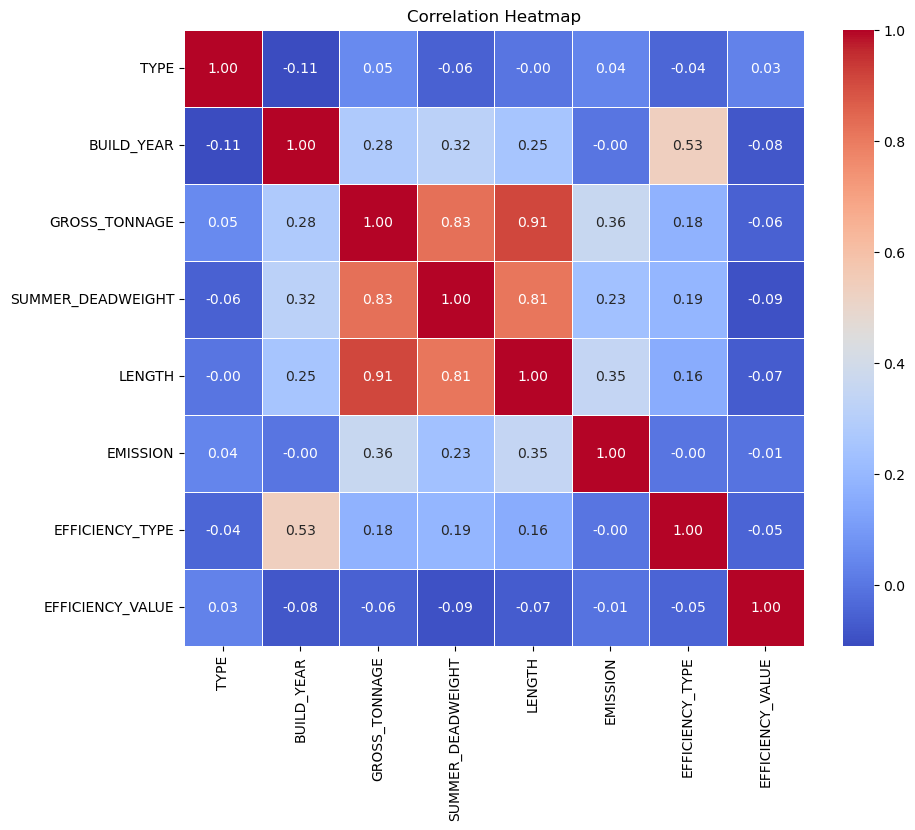

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(raw_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

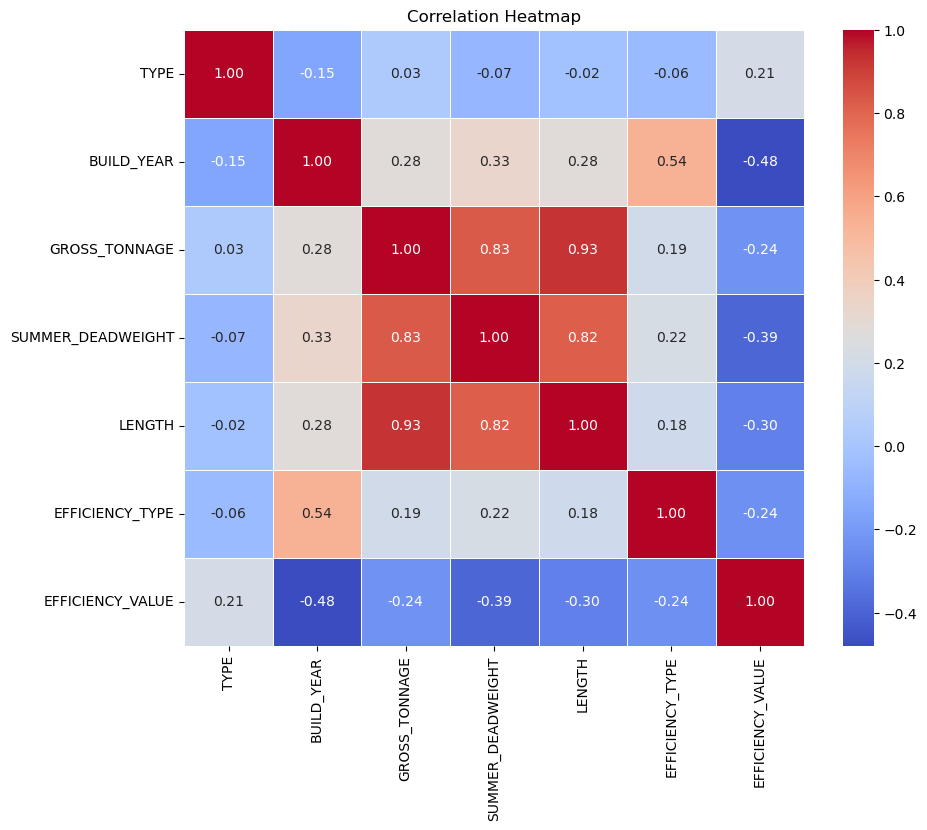

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(raw_test.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

### Regression Analysis

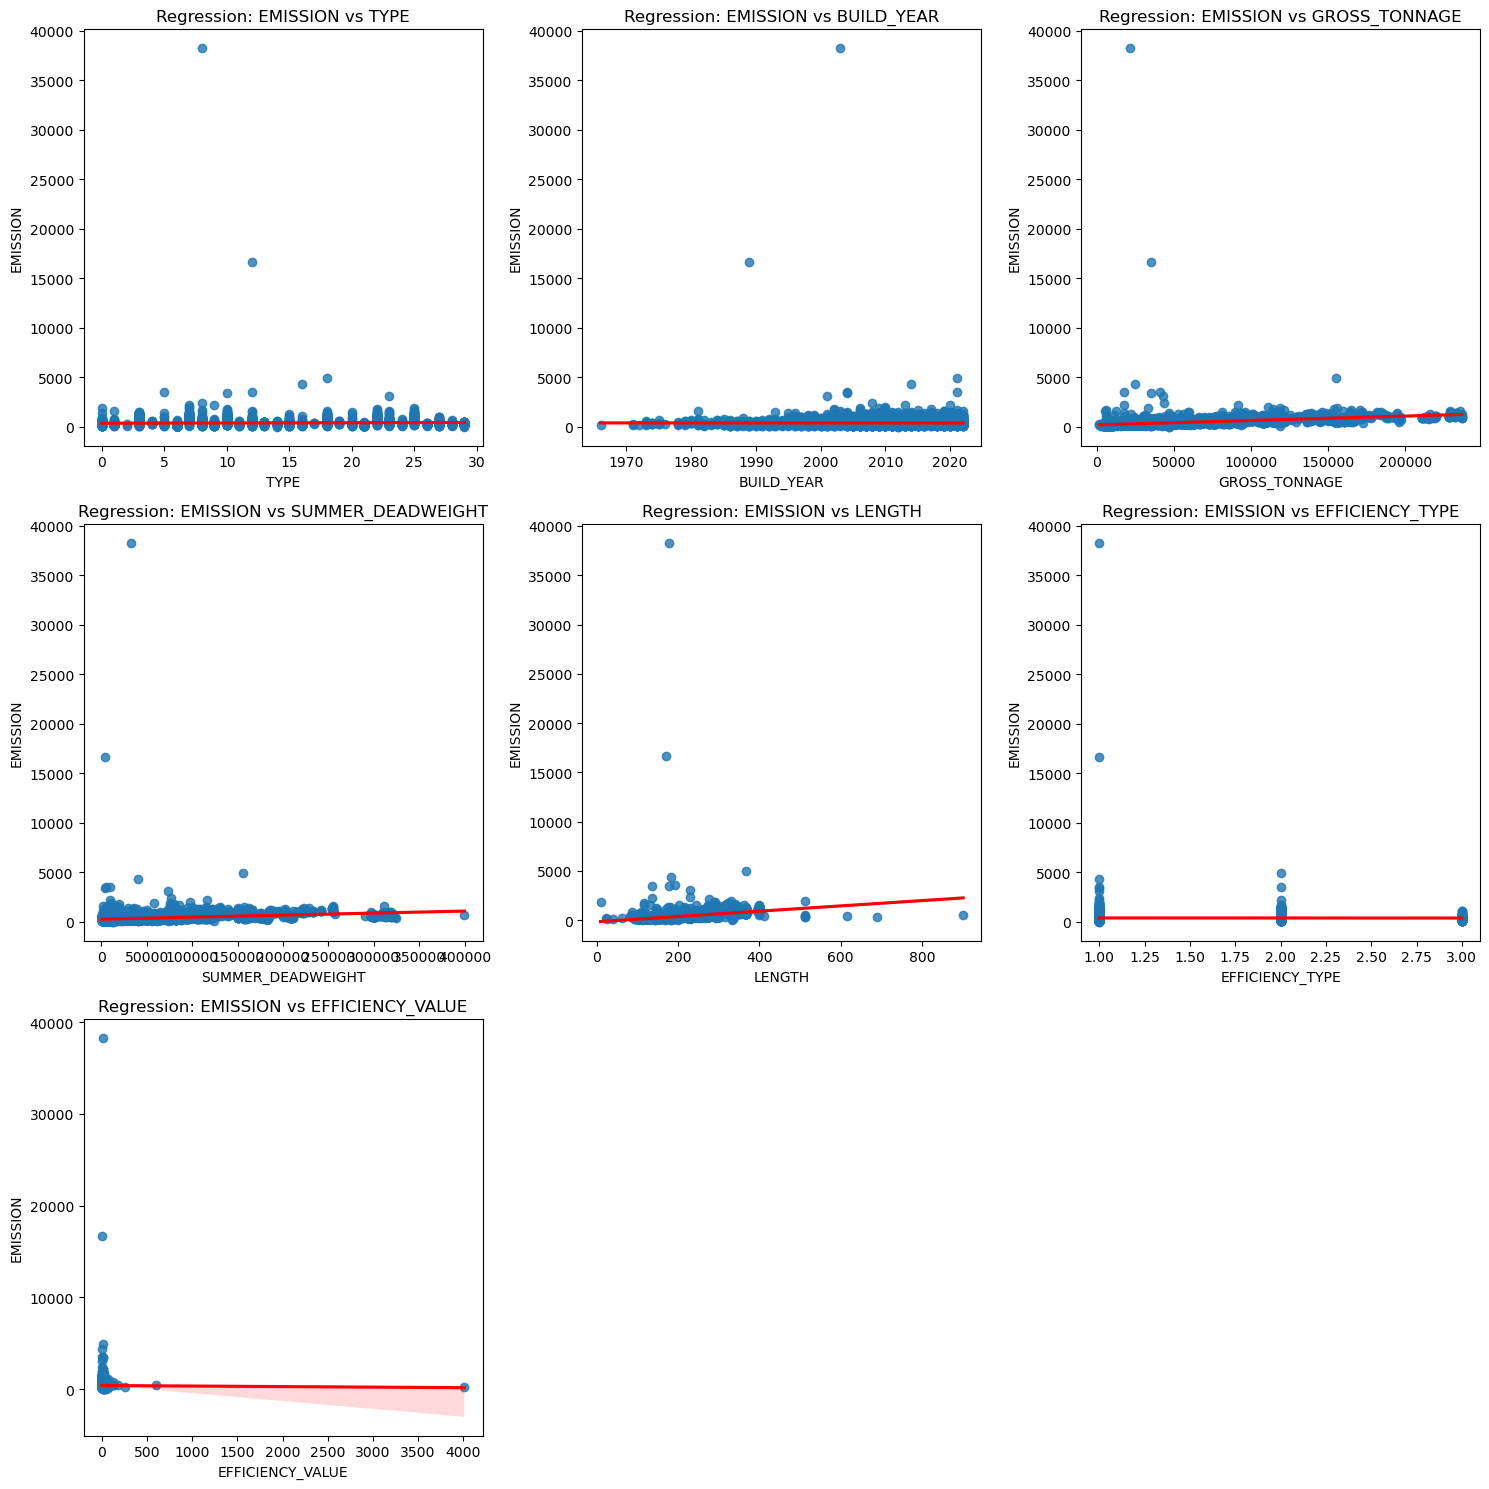

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

columns_to_plot = ['TYPE', 'BUILD_YEAR', 'GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH', 'EFFICIENCY_TYPE', 'EFFICIENCY_VALUE']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=raw_train[col], y=raw_train['EMISSION'], line_kws={"color": "red"})
    plt.title(f'Regression: EMISSION vs {col}')
    plt.xlabel(col)
    plt.ylabel('EMISSION')

plt.tight_layout()
plt.show()

### Outlier Detection

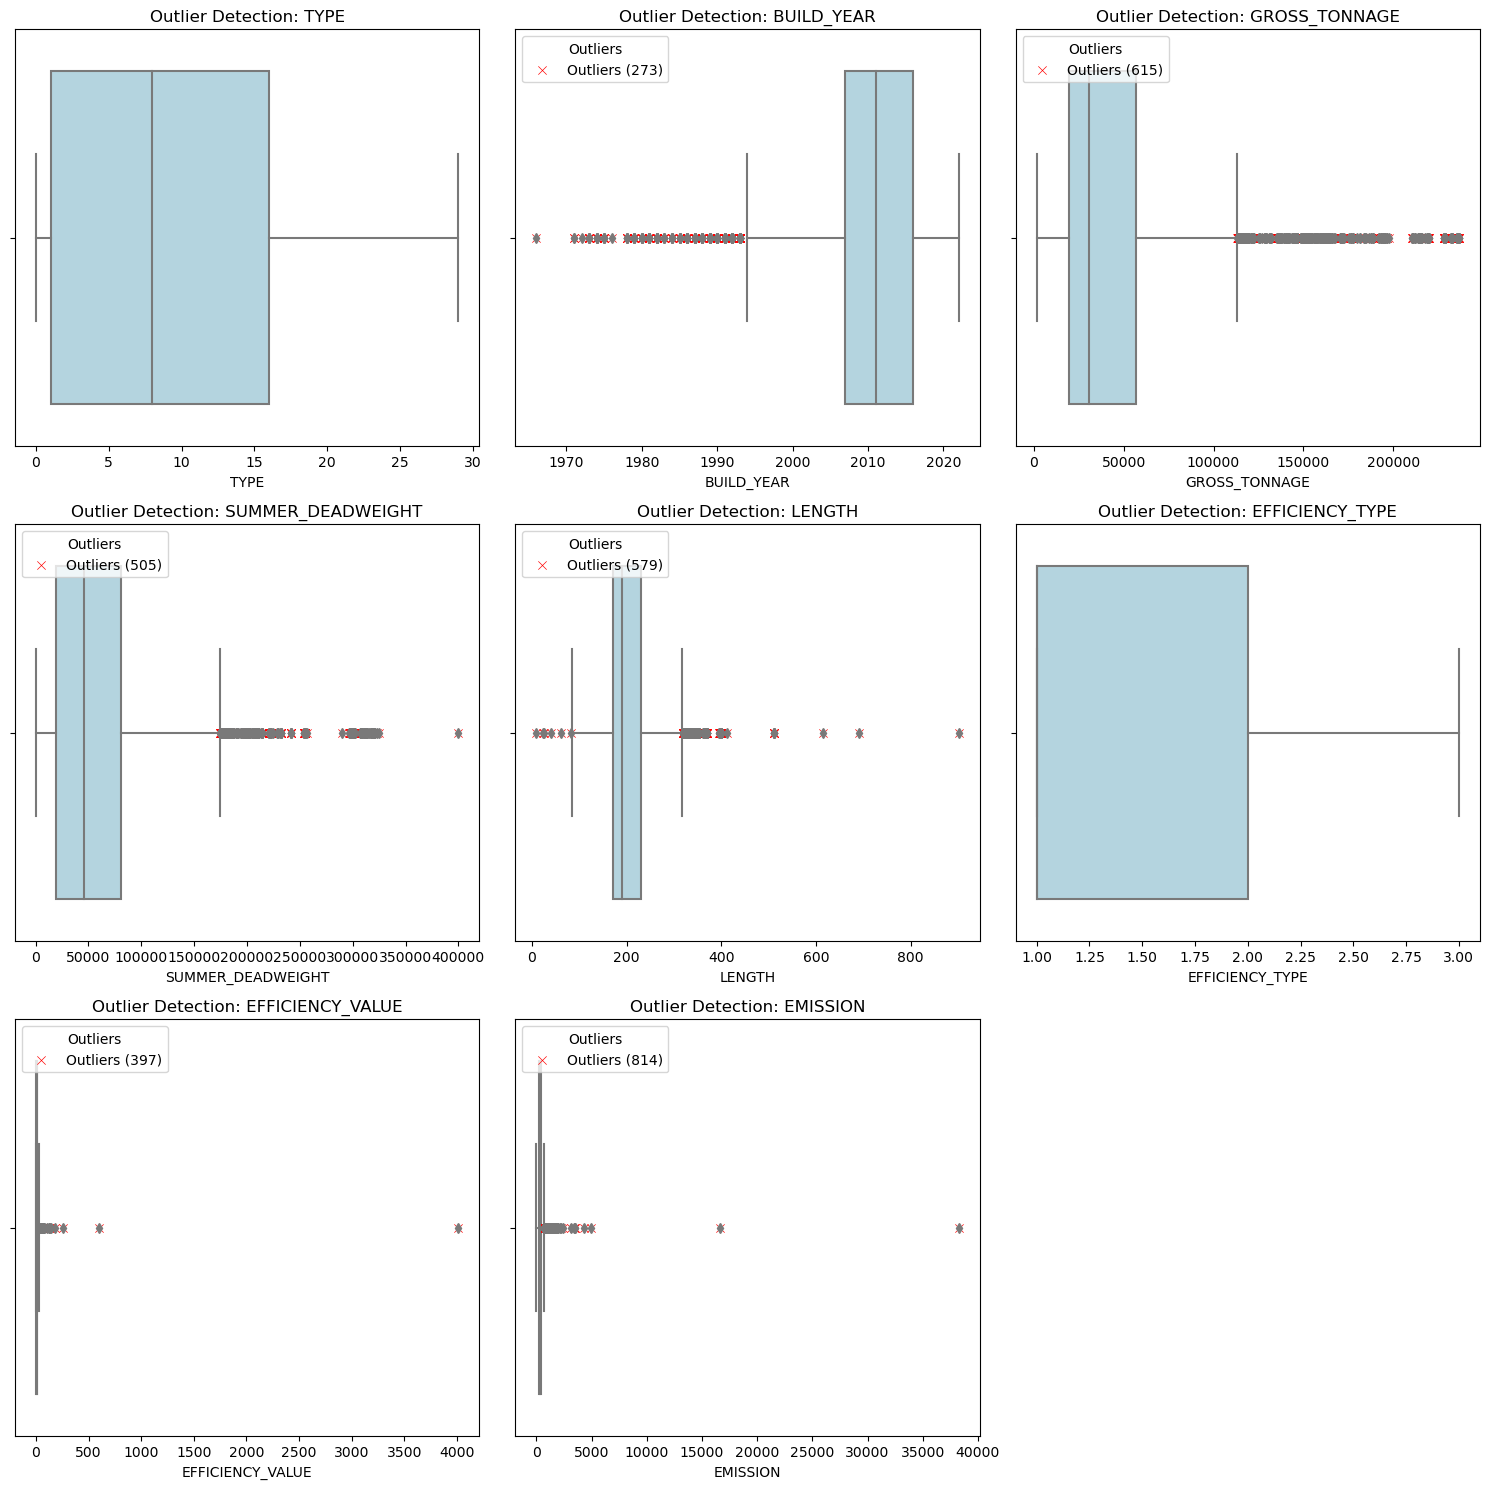

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 15))

columns_to_plot = ['TYPE', 'BUILD_YEAR', 'GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH', 'EFFICIENCY_TYPE', 'EFFICIENCY_VALUE', 'EMISSION']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    
    Q1 = raw_train[col].quantile(0.25)
    Q3 = raw_train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = raw_train[(raw_train[col] < lower_bound) | (raw_train[col] > upper_bound)]
    
    sns.boxplot(x=raw_train[col], color='lightblue')
    
    if len(outliers) > 0:
        sns.scatterplot(x=outliers[col], y=[0]*len(outliers), color='red', marker='x', label=f'Outliers ({len(outliers)})')
        plt.legend(title='Outliers', loc='upper left')
    
    plt.title(f'Outlier Detection: {col}')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

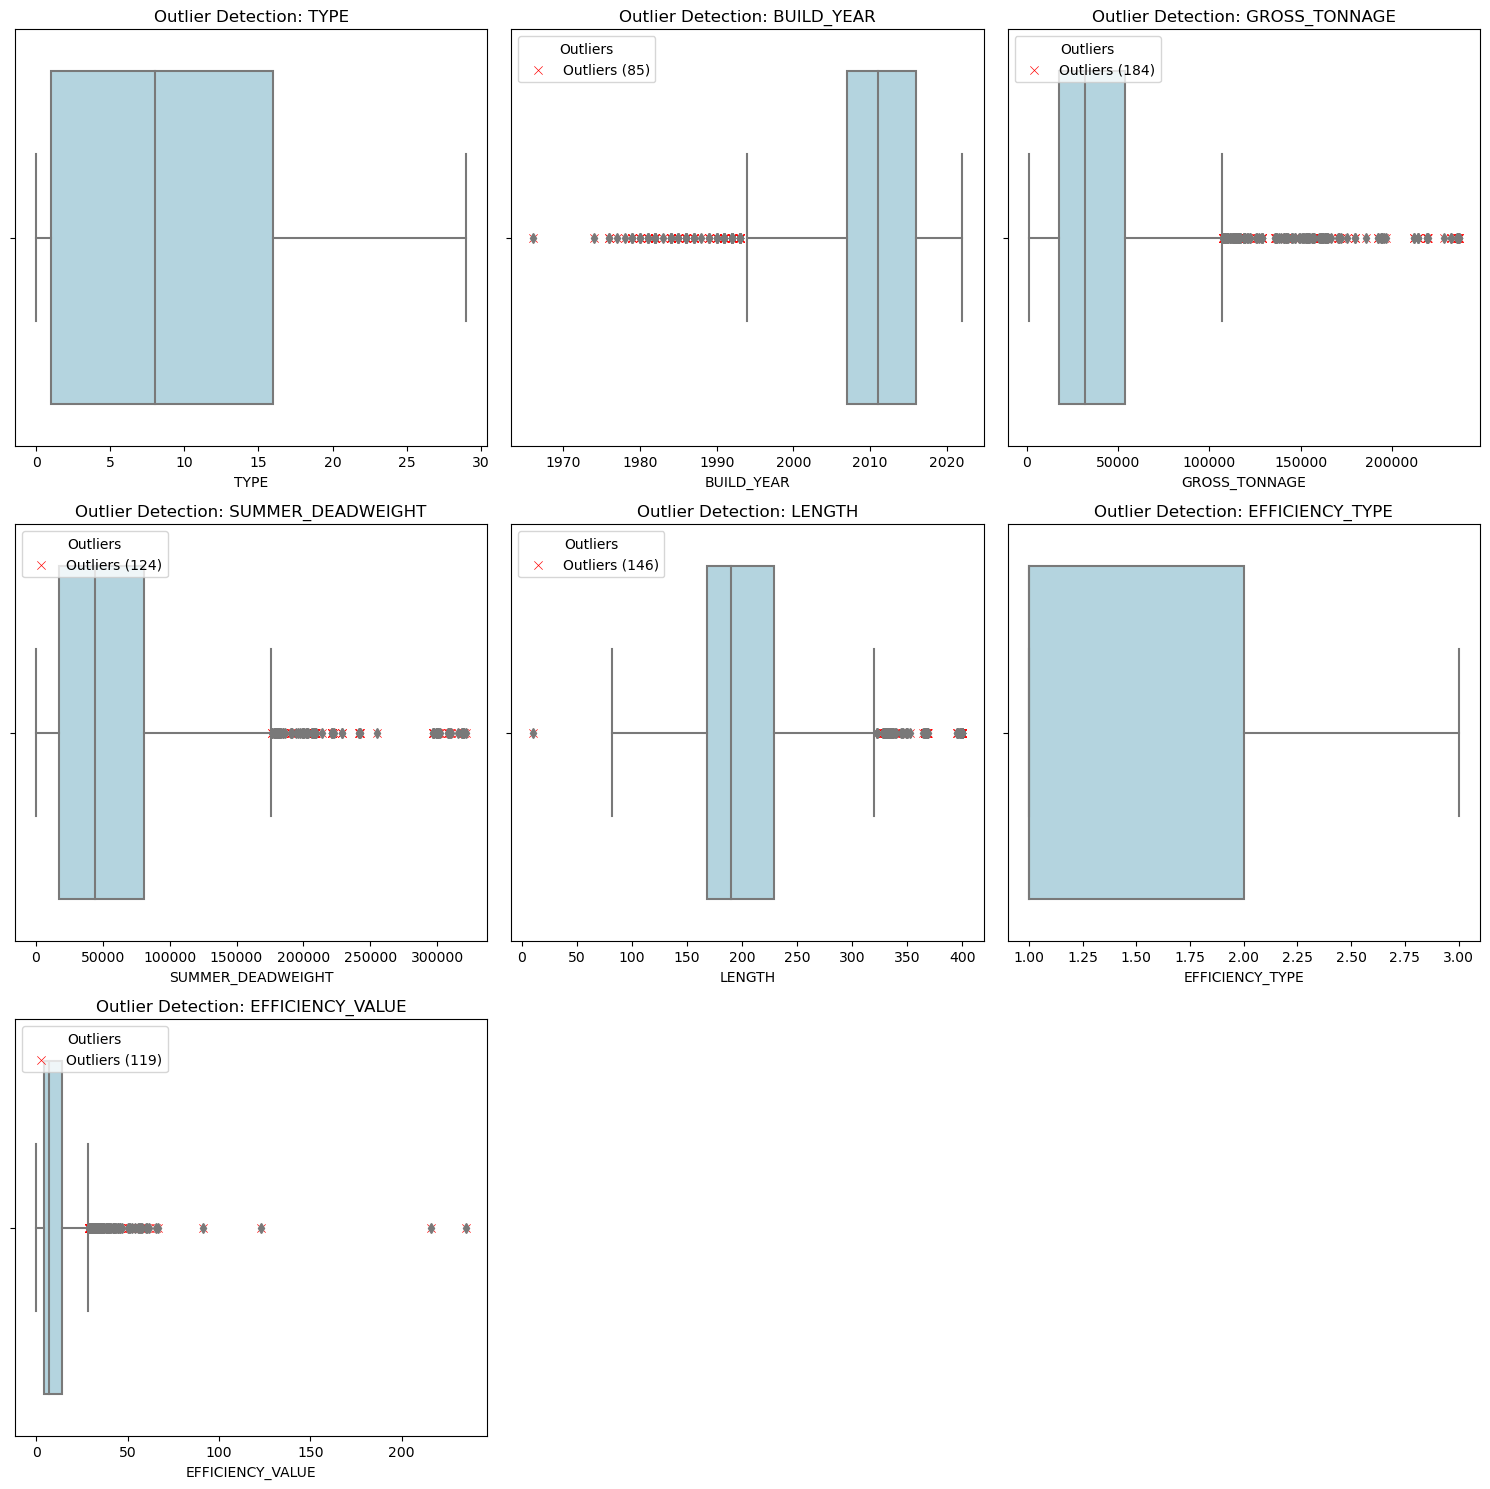

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 15))

columns_to_plot = ['TYPE', 'BUILD_YEAR', 'GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH', 'EFFICIENCY_TYPE', 'EFFICIENCY_VALUE']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    
    Q1 = raw_test[col].quantile(0.25)
    Q3 = raw_test[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = raw_test[(raw_test[col] < lower_bound) | (raw_test[col] > upper_bound)]
    
    sns.boxplot(x=raw_test[col], color='lightblue')
    
    if len(outliers) > 0:
        sns.scatterplot(x=outliers[col], y=[0]*len(outliers), color='red', marker='x', label=f'Outliers ({len(outliers)})')
        plt.legend(title='Outliers', loc='upper left')
    
    plt.title(f'Outlier Detection: {col}')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

### Distribution Analysis

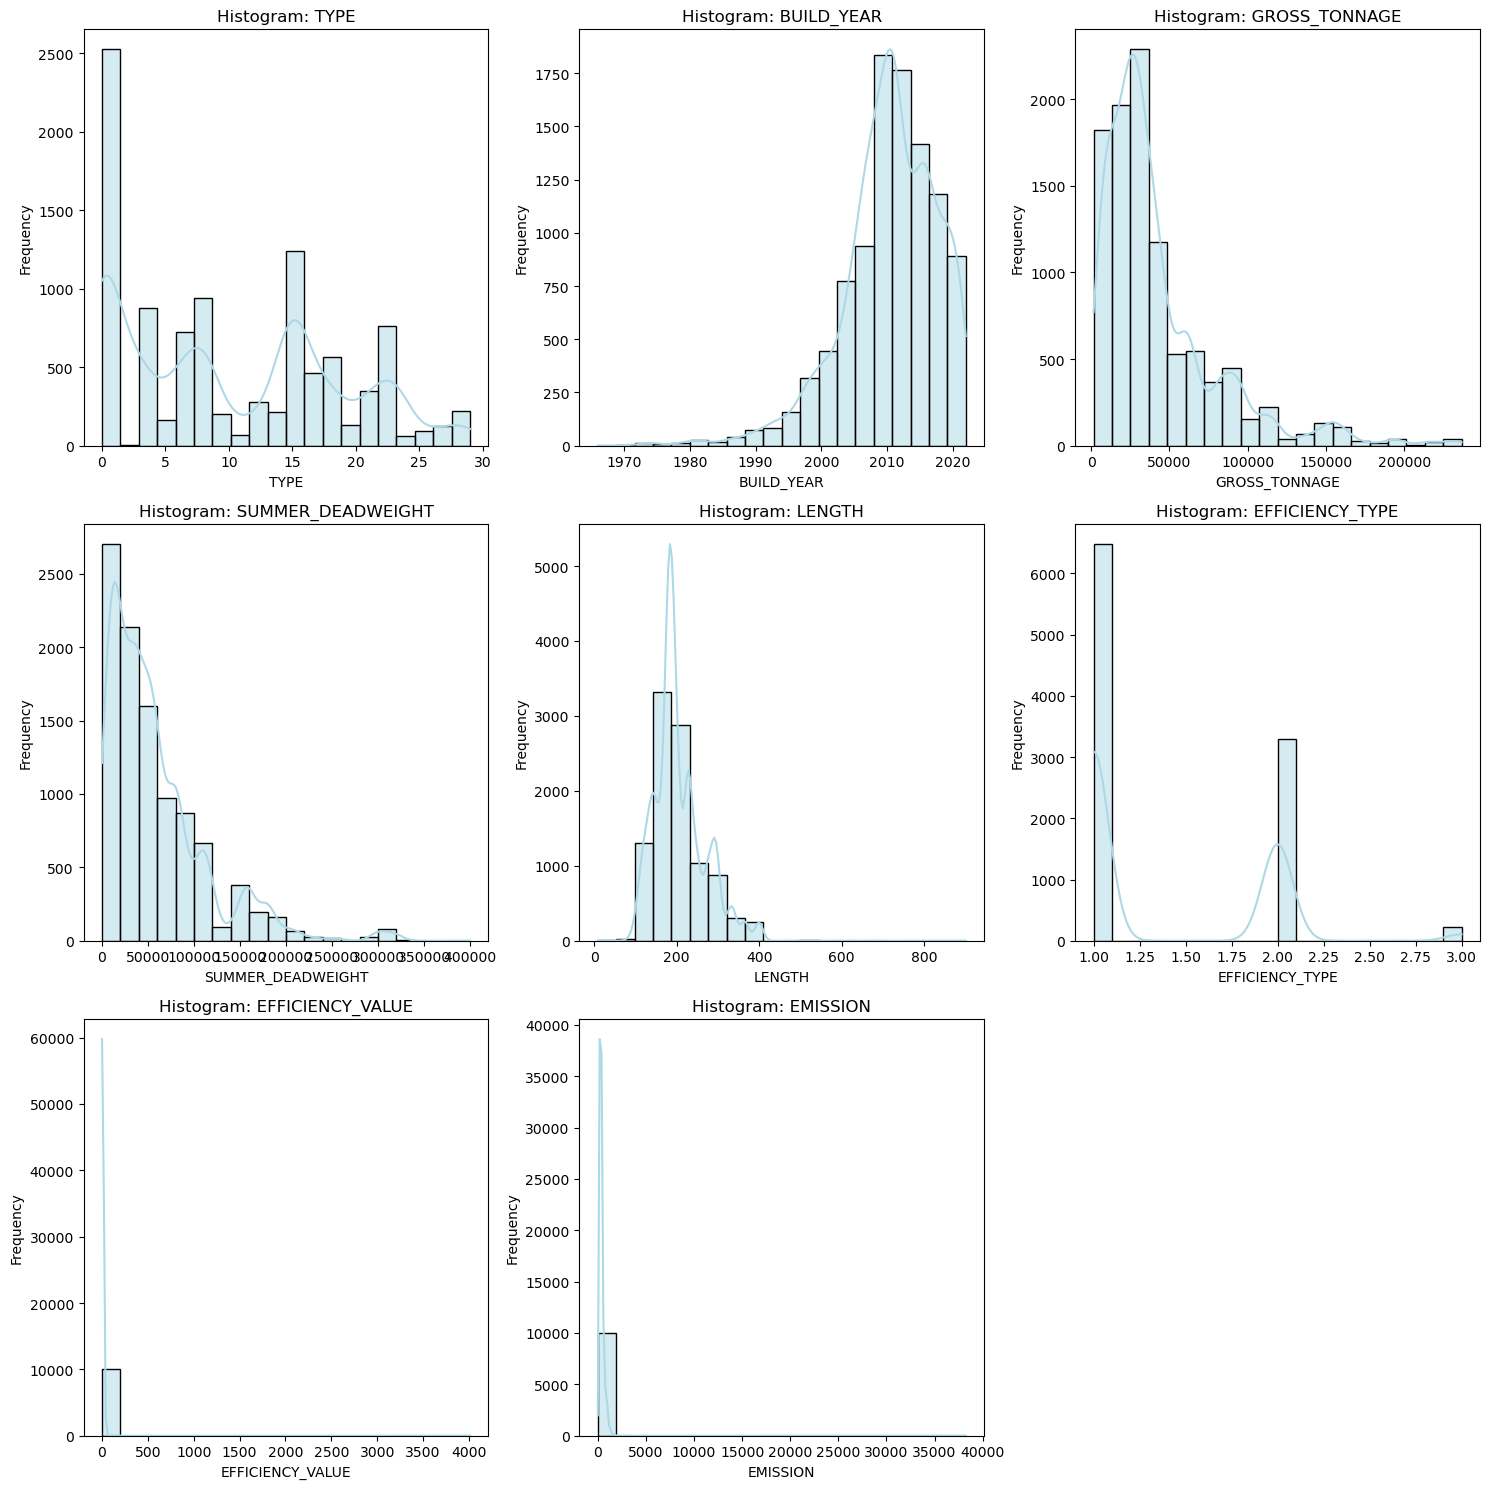

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 15))

columns_to_plot = ['TYPE', 'BUILD_YEAR', 'GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH', 'EFFICIENCY_TYPE', 'EFFICIENCY_VALUE', 'EMISSION']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    
    sns.histplot(raw_train[col], kde=True, color='lightblue', bins=20)
    
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

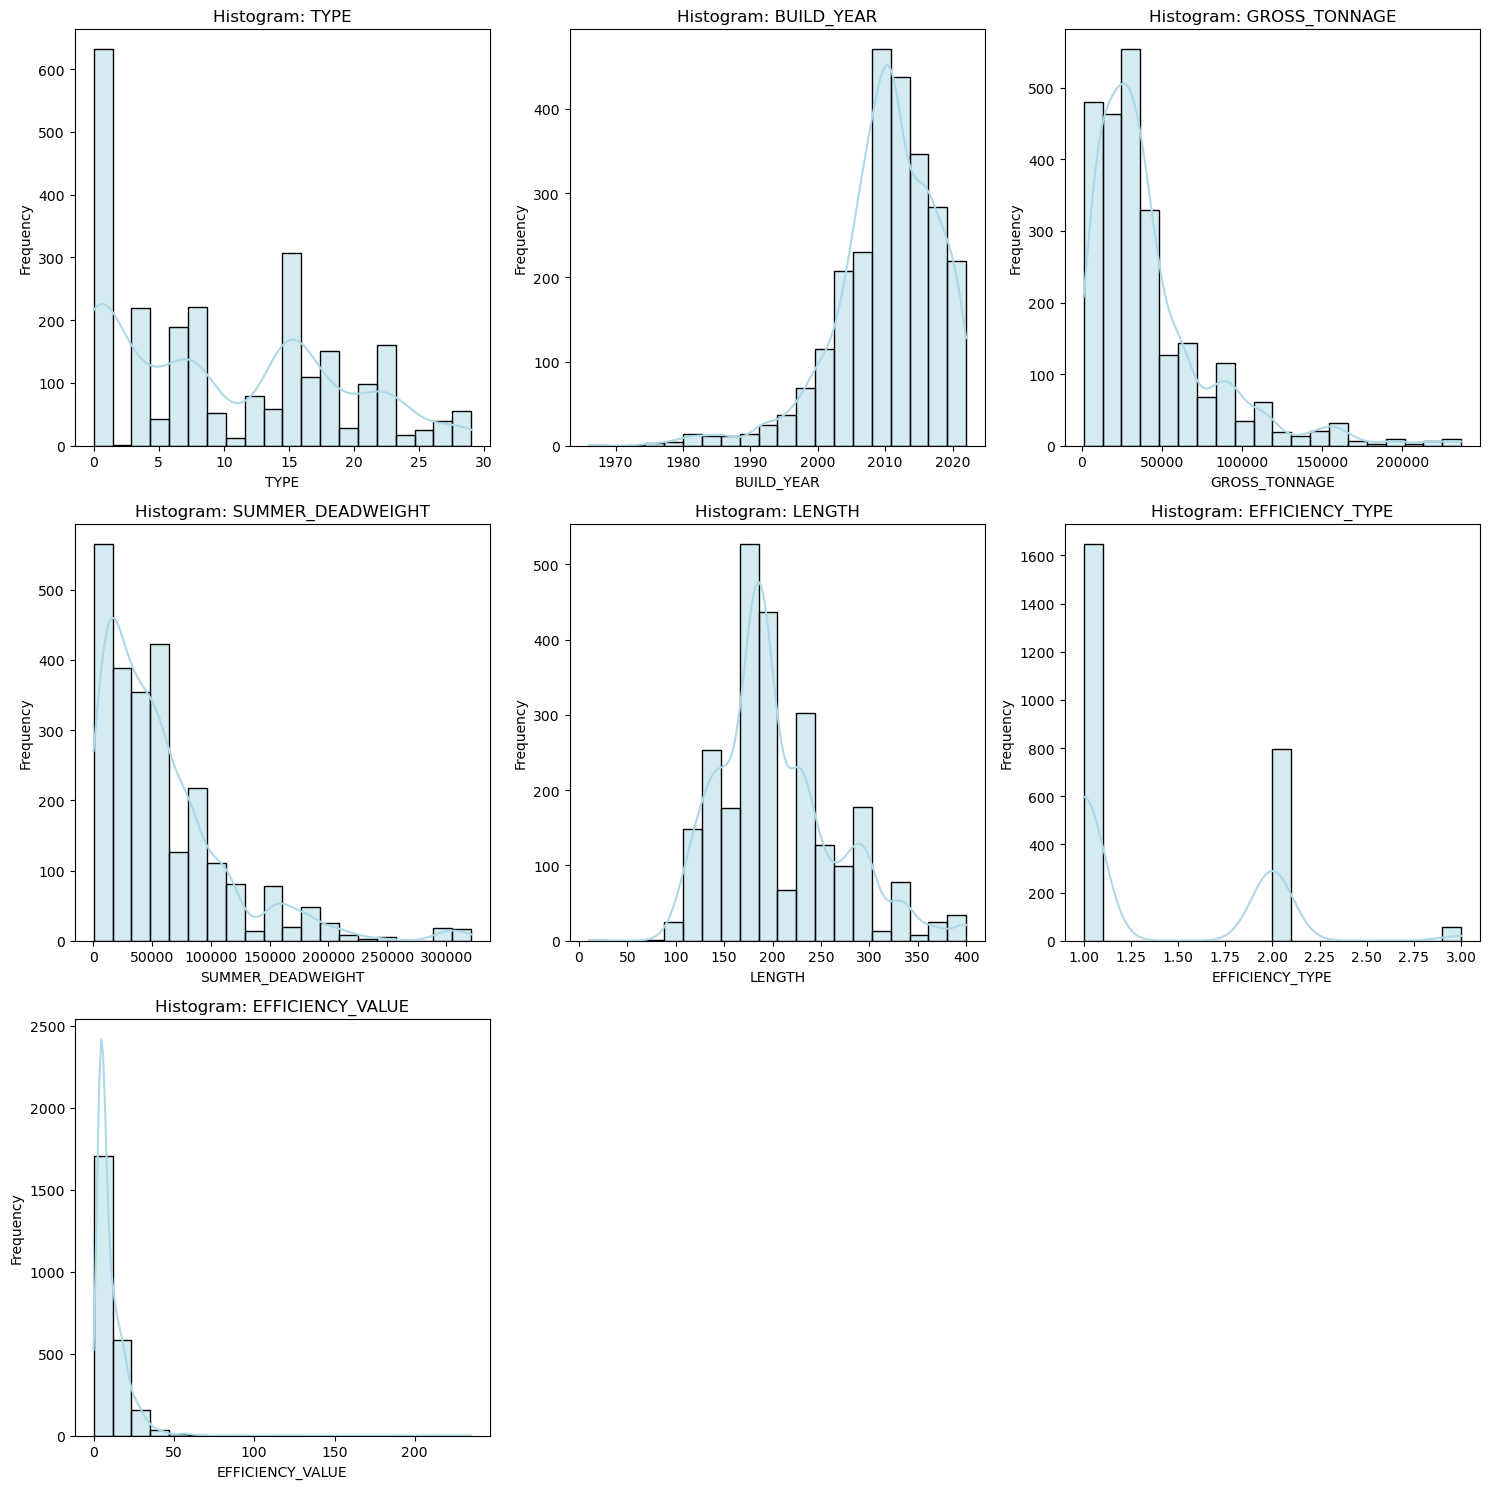

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 15))

columns_to_plot = ['TYPE', 'BUILD_YEAR', 'GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH', 'EFFICIENCY_TYPE', 'EFFICIENCY_VALUE']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    
    sns.histplot(raw_test[col], kde=True, color='lightblue', bins=20)
    
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

### Removing 10 Extreme Outliers for Raw_Data for understanding patterns better

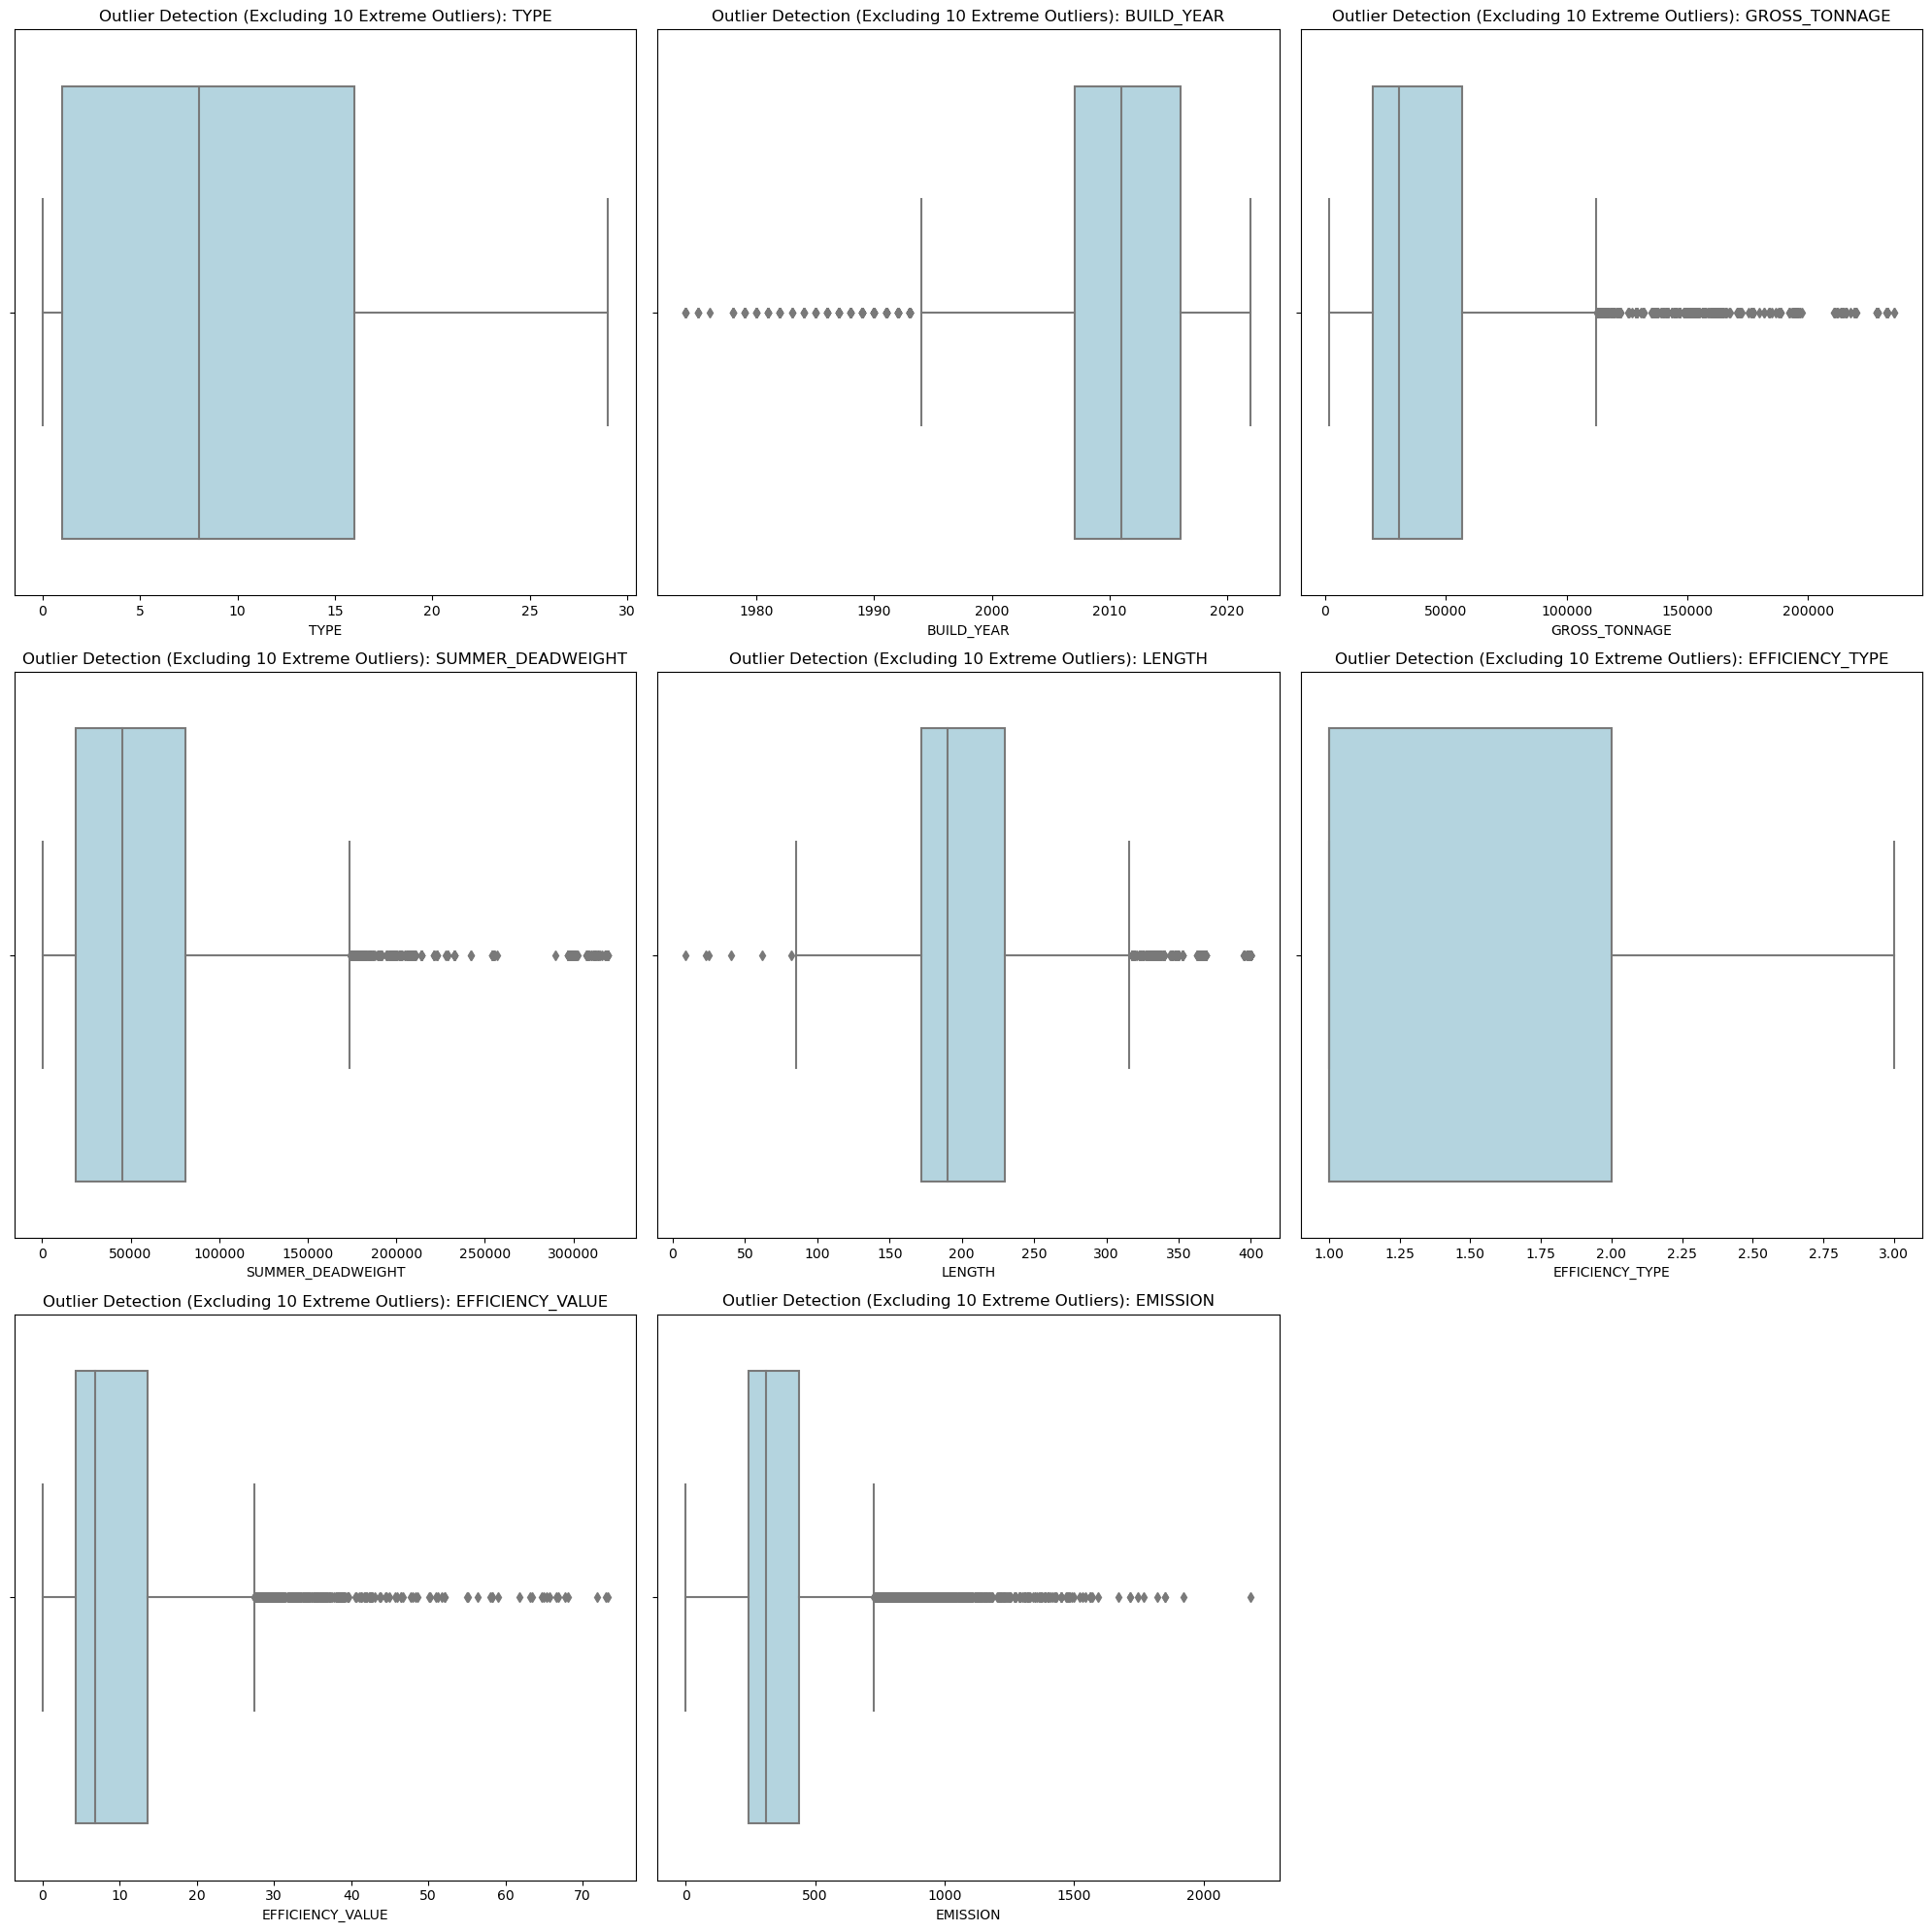

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

columns_to_plot = ['TYPE', 'BUILD_YEAR', 'GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH', 'EFFICIENCY_TYPE', 'EFFICIENCY_VALUE', 'EMISSION']

plt.figure(figsize=(20, 20))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    
    Q1 = raw_train[col].quantile(0.25)
    Q3 = raw_train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = raw_train[(raw_train[col] < lower_bound) | (raw_train[col] > upper_bound)]
    
    outliers['distance_from_median'] = outliers[col].apply(lambda x: abs(x - raw_train[col].median()))
    
    extreme_outliers = outliers.nlargest(10, 'distance_from_median')
    
    raw_train = raw_train[~raw_train.index.isin(extreme_outliers.index)]
    
    sns.boxplot(x=raw_train[col], color='lightblue')
    
    plt.title(f'Outlier Detection (Excluding 10 Extreme Outliers): {col}')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

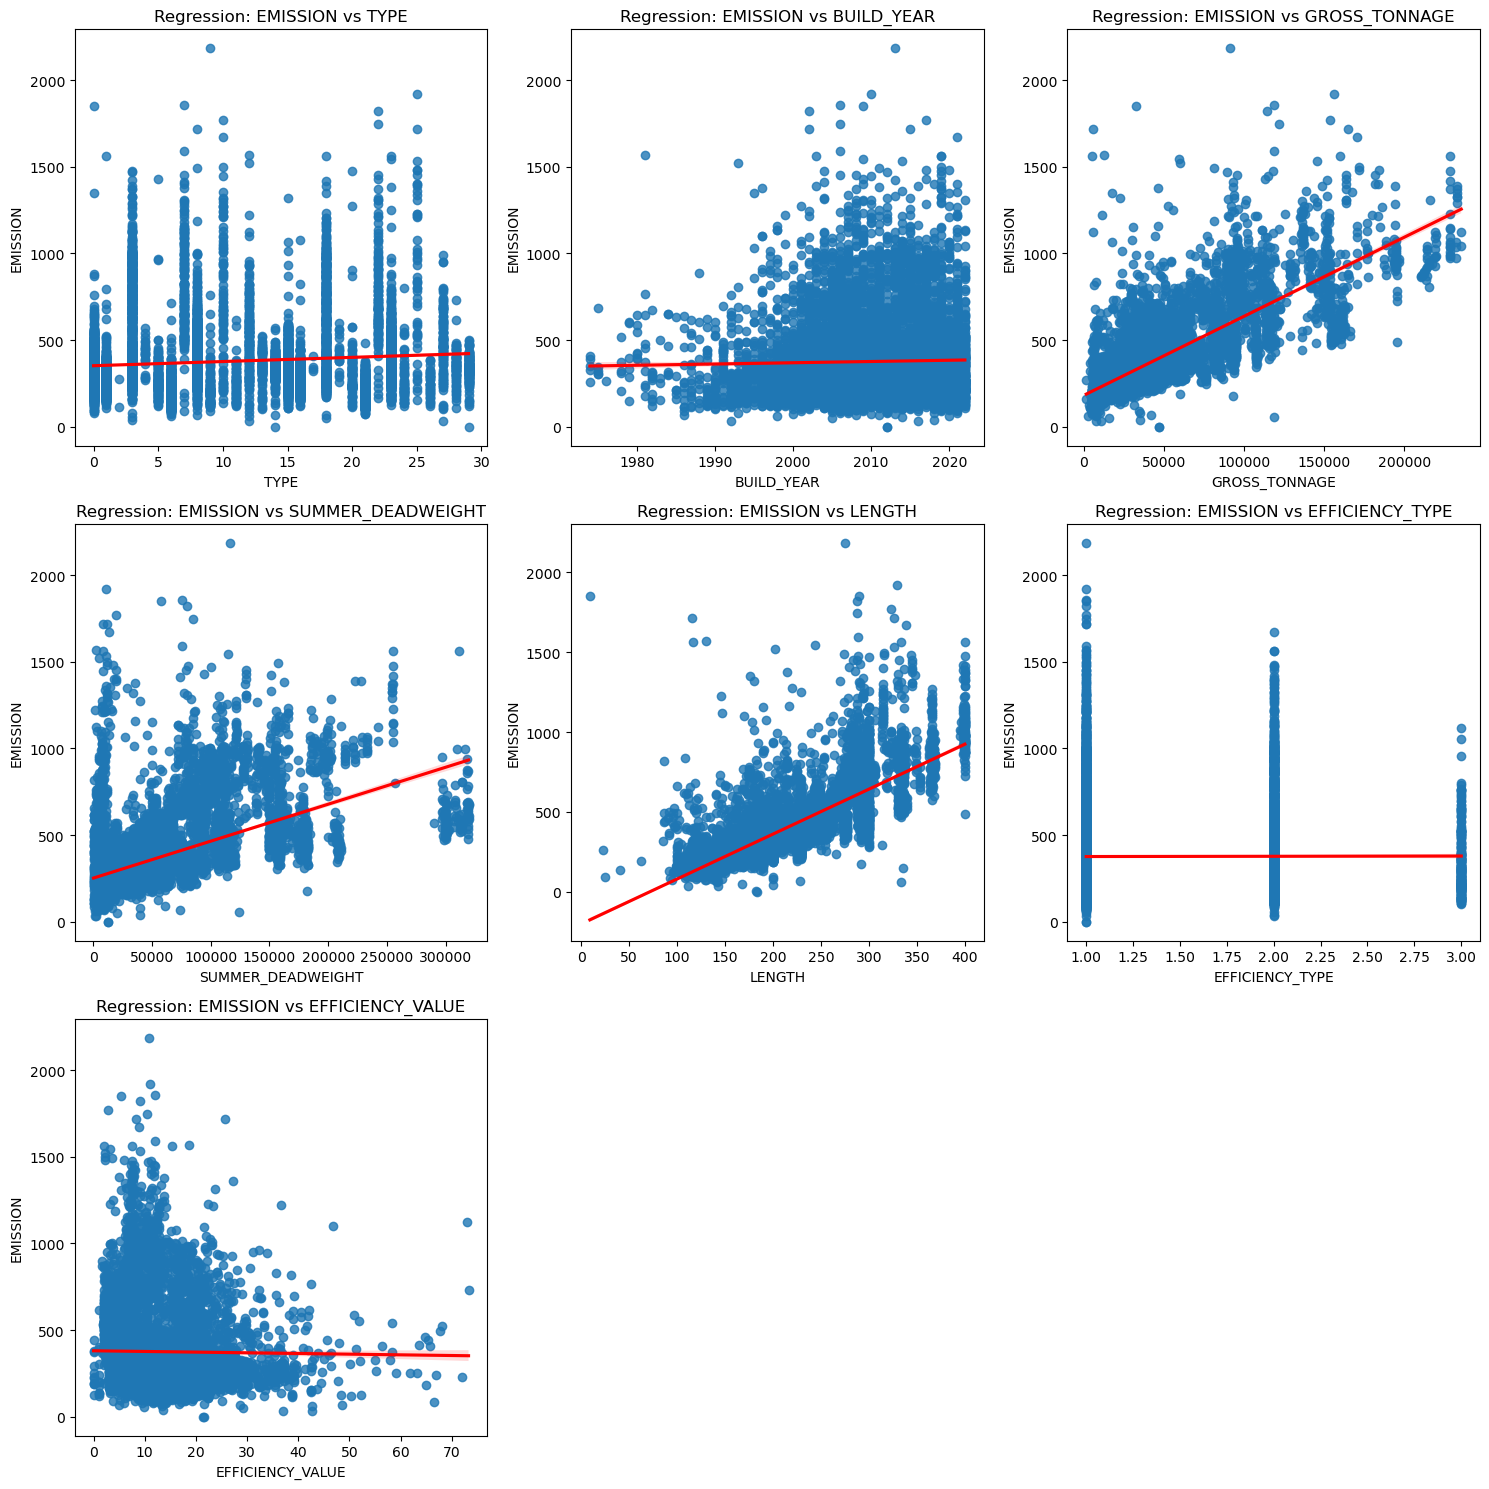

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

columns_to_plot = ['TYPE', 'BUILD_YEAR', 'GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH', 'EFFICIENCY_TYPE', 'EFFICIENCY_VALUE']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=raw_train[col], y=raw_train['EMISSION'], line_kws={"color": "red"})
    plt.title(f'Regression: EMISSION vs {col}')
    plt.xlabel(col)
    plt.ylabel('EMISSION')

plt.tight_layout()
plt.show()

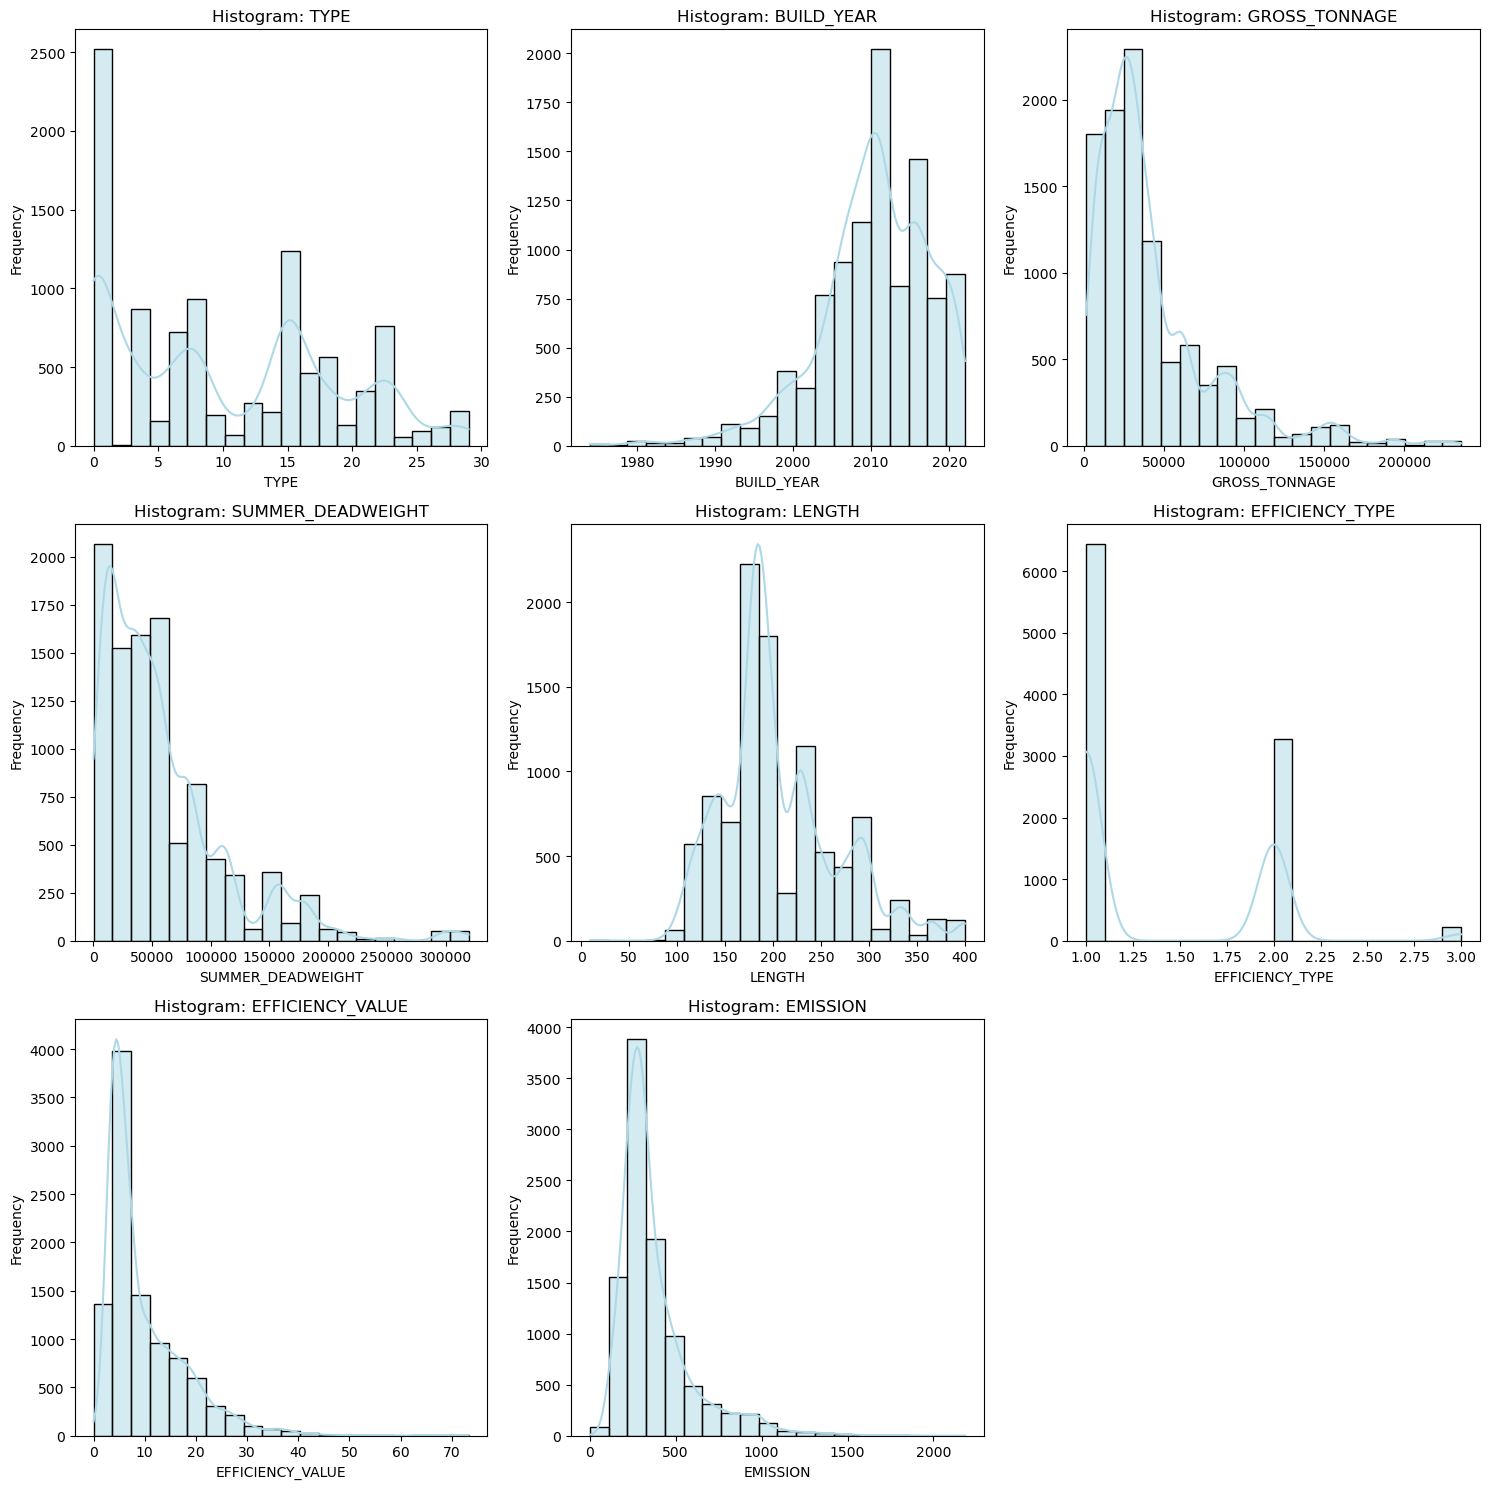

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 15))

columns_to_plot = ['TYPE', 'BUILD_YEAR', 'GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH', 'EFFICIENCY_TYPE', 'EFFICIENCY_VALUE', 'EMISSION']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    
    sns.histplot(raw_train[col], kde=True, color='lightblue', bins=20)
    
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

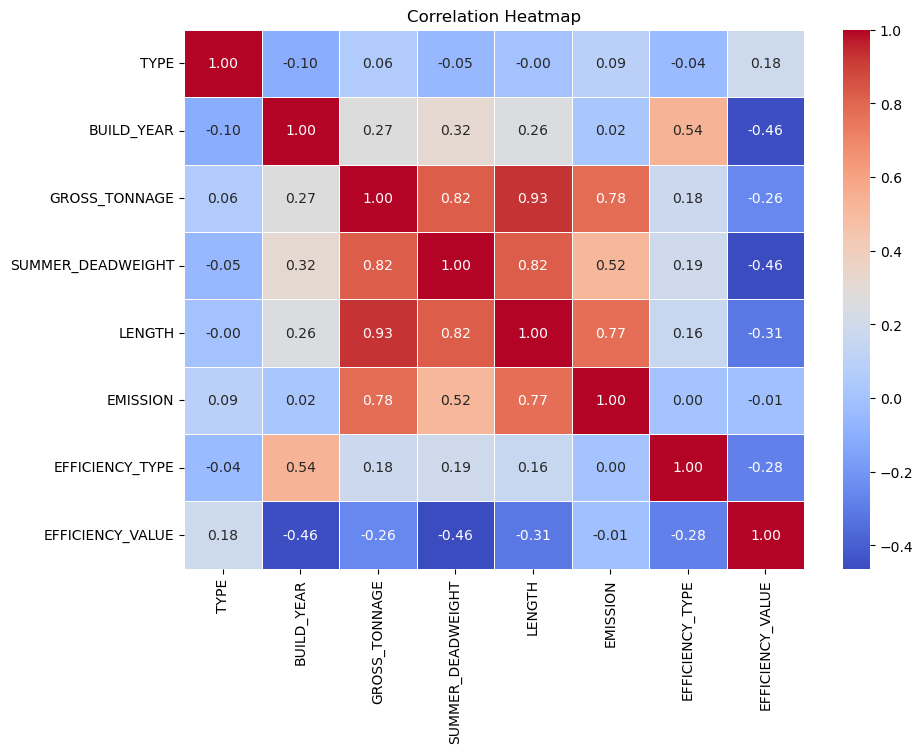

In [24]:
plt.figure(figsize=(10,7))
correlation_matrix = raw_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Multi-collinearity 

In [25]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_train = raw_train.select_dtypes(include=[np.number])
X_train = add_constant(X_train)

vif_train = pd.DataFrame()
vif_train["Variable"] = X_train.columns
vif_train["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("VIF for raw_train:")
print(vif_train)

X_test = raw_test.select_dtypes(include=[np.number])
X_test = add_constant(X_test)

vif_test = pd.DataFrame()
vif_test["Variable"] = X_test.columns
vif_test["VIF"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]

print("\nVIF for raw_test:")
print(vif_test)

VIF for raw_train:
            Variable            VIF
0              const  134956.112749
1               TYPE       1.070948
2         BUILD_YEAR       1.726400
3      GROSS_TONNAGE      10.318525
4  SUMMER_DEADWEIGHT       4.694562
5             LENGTH       9.375217
6           EMISSION       3.630874
7    EFFICIENCY_TYPE       1.416077
8   EFFICIENCY_VALUE       1.661229

VIF for raw_test:
            Variable            VIF
0              const  125103.334395
1               TYPE       1.081289
2         BUILD_YEAR       1.767732
3      GROSS_TONNAGE       8.528114
4  SUMMER_DEADWEIGHT       3.885898
5             LENGTH       7.637621
6    EFFICIENCY_TYPE       1.413898
7   EFFICIENCY_VALUE       1.516656


### Scatterplot of Emissions vs Efficiency values WRTO Efficiency Types

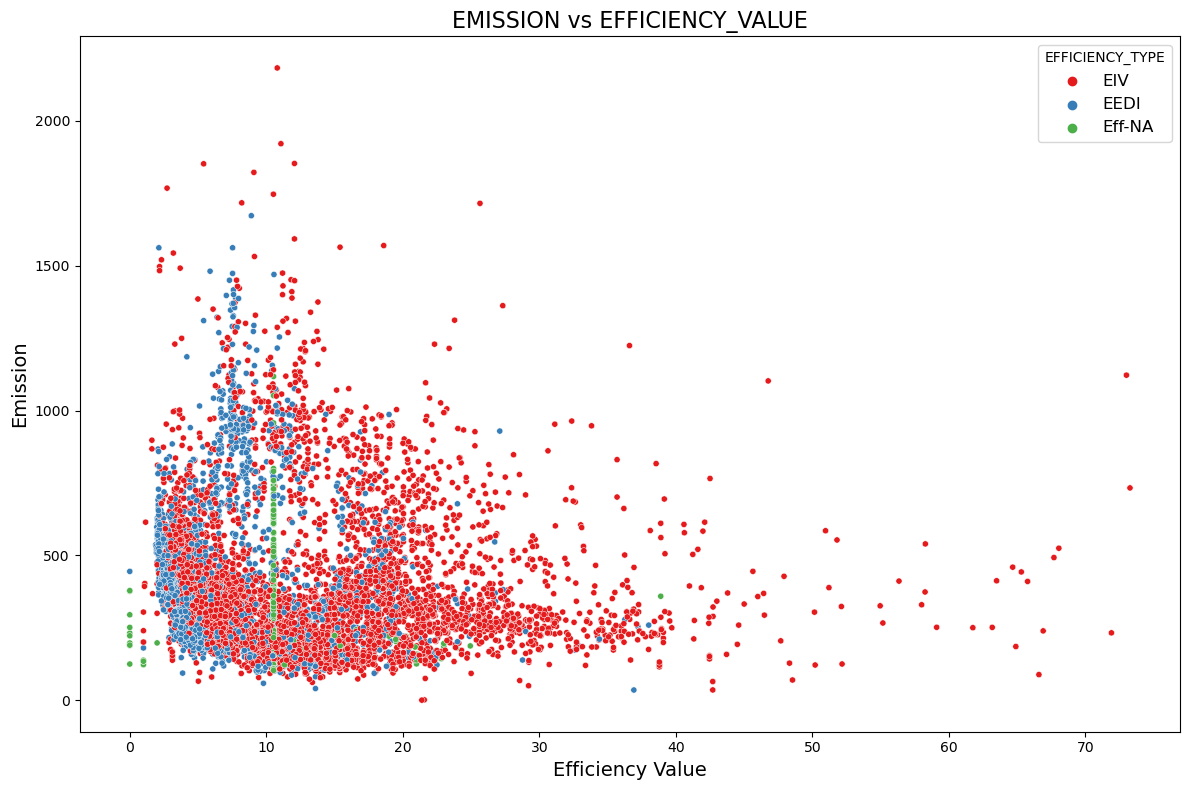

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

efficiency_type_mapping = {1: 'EIV', 2: 'EEDI', 3: 'Eff-NA'}
raw_train['EFFICIENCY_TYPE_LABEL'] = raw_train['EFFICIENCY_TYPE'].map(efficiency_type_mapping)

plt.figure(figsize=(12, 8))

sns.scatterplot(data=raw_train, 
                x='EFFICIENCY_VALUE', 
                y='EMISSION', 
                hue='EFFICIENCY_TYPE_LABEL', 
                palette='Set1',  
                s=20, 
                edgecolor='w',   
                marker='o')

plt.title('EMISSION vs EFFICIENCY_VALUE', fontsize=16)
plt.xlabel('Efficiency Value', fontsize=14)
plt.ylabel('Emission', fontsize=14)

plt.legend(title='EFFICIENCY_TYPE', loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

### Raw Data Exploration - Insights

**Regression Analysis:** Not a good fit but a few features has linearity with Emission

**Outlier Detection:** Many outliers for almost all features but few are significant 

**Correlation Analysis:** No highly correlated features but 3 features have notable correlation with Emission

**Distribution B/W Train and Test:** Train and Test data has similar distributions and patterns

**Multi-Collinearity:** Moderate Multi-collinearity is present

**Scatter of Emissions vs Eff Values WRTO Eff Type**: No Significant Pattern change WRTO Efficiency Type

**No Missing Values**


### Raw Data Exploration - Key Takeaways

**Removing only extreme outliers for train data to remain the data distribution similar to test data**

**Considering ML Models which can handle the remaining outliers for better prediction**

**Minding the moderate multicollinearity during modeling**

# Data Pre-Processing

In [27]:
data = df_train.copy()
test = df_test.copy()

In [28]:
data.head()

,IMO,NAME,TYPE,BUILD_YEAR,REGISTERED,EFFICIENCY,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH,EMISSION
0,9354399,DAGMAR,Container ship,2006,yes,EIV (27.84 gCO₂/t·nm),9962,11431,134,226.54
1,9799123,NEW PRIME,Oil tanker,2018,yes,EEDI (2.12 gCO₂/t·nm),159843,311003,333,617.66
2,9102746,MSC DON GIOVANNI,Container ship,1996,yes,EIV (14.32 gCO₂/t·nm),29181,41590,203,400.14
3,9298686,MAERSK IOWA,Container ship,2006,yes,EEDI (19.1 gCO₂/t·nm),50686,61454,292,559.27
4,9302633,MSC FAIRFIELD,Container ship,2006,yes,EIV (20.34 gCO₂/t·nm),90389,111184,336,884.52


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IMO                10000 non-null  int64  
 1   NAME               10000 non-null  object 
 2   TYPE               10000 non-null  object 
 3   BUILD_YEAR         10000 non-null  int64  
 4   REGISTERED         10000 non-null  object 
 5   EFFICIENCY         10000 non-null  object 
 6   GROSS_TONNAGE      10000 non-null  int64  
 7   SUMMER_DEADWEIGHT  10000 non-null  int64  
 8   LENGTH             10000 non-null  int64  
 9   EMISSION           10000 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [30]:
data.describe()

,IMO,BUILD_YEAR,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH,EMISSION
count,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,9.502368e+06,2010.372200,43196.79660,59040.502700,206.362200,386.225403
std,2.850491e+05,7.302068,38356.24713,54370.007649,61.912988,476.523320
min,6.703343e+06,1966.000000,1562.00000,340.000000,9.000000,0.300000
25%,9.333676e+06,2007.000000,19420.00000,19034.250000,172.000000,243.567500
50%,9.496474e+06,2011.000000,30641.00000,45547.000000,190.000000,311.235000
75%,9.718798e+06,2016.000000,56957.75000,81119.000000,230.000000,438.652500
max,9.952608e+06,2022.000000,236583.00000,399821.000000,901.000000,38244.960000


### Handling Efficiency Column

In [31]:
eiv_count = data['EFFICIENCY'].str.contains('EIV', na=False).sum()
eedi_count = data['EFFICIENCY'].str.contains('EEDI', na=False).sum()
na_count = data['EFFICIENCY'].str.contains('Not Applicable', na=False).sum()

total_count = eiv_count + eedi_count + na_count

print(f"EIV count: {eiv_count}")
print(f"EEDI count: {eedi_count}")
print(f"Not Applicable count: {na_count}")
print(f"Total count: {total_count}")

EIV count: 6479
EEDI count: 3301
Not Applicable count: 220
Total count: 10000


In [32]:
# Processing Efficiency Columns
def process_efficiency(df):
    # One-hot encoded columns
    df['EIV'] = df['EFFICIENCY'].str.contains('EIV', na=False).astype(int)
    df['EEDI'] = df['EFFICIENCY'].str.contains('EEDI', na=False).astype(int)
    df['Eff-NA'] = df['EFFICIENCY'].str.contains('Not Applicable', na=False).astype(int)

    df['EFFICIENCY_VALUES'] = df['EFFICIENCY'].str.extract(r'([\d\.]+)').astype(float)

    mean_efficiency = df['EFFICIENCY_VALUES'].mean(skipna=True)
    df['EFFICIENCY_VALUES'].fillna(mean_efficiency, inplace=True)
    
    return df

data = process_efficiency(data)
test = process_efficiency(test)

### Encoding and Removal of Unnecessary Columns

In [33]:
def process_data(df):
    df.drop(['IMO', 'NAME', 'EFFICIENCY', 'REGISTERED'], axis=1, inplace=True)
    
    df = pd.get_dummies(df, columns=['TYPE'], drop_first=True)
    
    boolean_cols = df.select_dtypes(include=[bool]).columns
    df[boolean_cols] = df[boolean_cols].astype(int)
    
    return df

data = process_data(data)
test = process_data(test)
data.shape

(10000, 38)

### Outlier Removal (Only Extreme 100 Data Points)

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

outlier_cols = ['GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH', 'EMISSION', 'EFFICIENCY_VALUES']

def remove_top_outliers(df, cols, n):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_clean[(df_clean[col] > upper_bound) | (df_clean[col] < lower_bound)]
        outliers = outliers.sort_values(by=col, ascending=False).head(n)
        df_clean = df_clean.drop(outliers.index)

    return df_clean

data = remove_top_outliers(data, outlier_cols, n=100)
data.shape

(9500, 38)

### PCA, Feature Engineering and Selection - Not Significant

In [35]:
data.head()

,BUILD_YEAR,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH,EMISSION,EIV,EEDI,Eff-NA,EFFICIENCY_VALUES,TYPE_Chemical tanker,...,TYPE_gas carrier,TYPE_general cargo ship,TYPE_lng carrier,TYPE_oil tanker,TYPE_other ship types,TYPE_passenger ship,TYPE_refrigerated cargo carrier,TYPE_ro-pax ship,TYPE_ro-ro ship,TYPE_vehicle carrier
0,2006,9962,11431,134,226.54,1,0,0,27.84,0,...,0,0,0,0,0,0,0,0,0,0
2,1996,29181,41590,203,400.14,1,0,0,14.32,0,...,0,0,0,0,0,0,0,0,0,0
3,2006,50686,61454,292,559.27,0,1,0,19.10,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,90389,111184,336,884.52,1,0,0,20.34,0,...,0,0,0,0,0,0,0,0,0,0
6,2004,58070,106070,240,422.46,1,0,0,3.83,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data.columns

Index(['BUILD_YEAR', 'GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH',
       'EMISSION', 'EIV', 'EEDI', 'Eff-NA', 'EFFICIENCY_VALUES',
       'TYPE_Chemical tanker', 'TYPE_Combination carrier',
       'TYPE_Container ship', 'TYPE_Container/ro-ro cargo ship',
       'TYPE_Gas carrier', 'TYPE_General cargo ship', 'TYPE_LNG carrier',
       'TYPE_Oil tanker', 'TYPE_Other ship types', 'TYPE_Passenger ship',
       'TYPE_Refrigerated cargo carrier', 'TYPE_Ro-pax ship',
       'TYPE_Ro-ro ship', 'TYPE_Vehicle carrier', 'TYPE_bulk carrier',
       'TYPE_chemical tanker', 'TYPE_combination carrier',
       'TYPE_container ship', 'TYPE_container/ro-ro cargo ship',
       'TYPE_gas carrier', 'TYPE_general cargo ship', 'TYPE_lng carrier',
       'TYPE_oil tanker', 'TYPE_other ship types', 'TYPE_passenger ship',
       'TYPE_refrigerated cargo carrier', 'TYPE_ro-pax ship',
       'TYPE_ro-ro ship', 'TYPE_vehicle carrier'],
      dtype='object')

In [37]:
data.shape

(9500, 38)

# Modeling

### Linear Regression, Lasso, Ridge, SVR, KNN, 
### Decision Tree, Random Forest, AdaB, CatB

In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
import warnings

warnings.filterwarnings("ignore")

X = data.drop(columns=['EMISSION'], axis=1)
y = data['EMISSION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {}

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R² Score': r2}
    print(f"{model_name} -> RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

# Linear Regression
evaluate_model(LinearRegression(), X_train, X_test, y_train, y_test, "Linear Regression")

# Lasso Regression
evaluate_model(Lasso(alpha=0.1), X_train_scaled, X_test_scaled, y_train, y_test, "Lasso Regression")

# Ridge Regression
evaluate_model(Ridge(alpha=1.0), X_train_scaled, X_test_scaled, y_train, y_test, "Ridge Regression")

# Support Vector Regression
evaluate_model(SVR(kernel='rbf'), X_train_scaled, X_test_scaled, y_train, y_test, "SVM Regression")

# K-Nearest Neighbors Regression
evaluate_model(KNeighborsRegressor(n_neighbors=5), X_train_scaled, X_test_scaled, y_train, y_test, "KNN Regression")

# Decision Tree Regression
evaluate_model(DecisionTreeRegressor(max_depth=5), X_train, X_test, y_train, y_test, "Decision Tree Regression")

# Random Forest Regression
evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test, "Random Forest Regression")

# AdaBoost Regression
evaluate_model(AdaBoostRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test, "AdaBoost Regression")

# CatBoost Regression
evaluate_model(CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=0), 
               X_train, X_test, y_train, y_test, "CatBoost Regression")


Linear Regression -> RMSE: 78.9809, R² Score: 0.8030
Lasso Regression -> RMSE: 78.9924, R² Score: 0.8030
Ridge Regression -> RMSE: 78.9825, R² Score: 0.8030
SVM Regression -> RMSE: 122.9582, R² Score: 0.5226
KNN Regression -> RMSE: 75.2810, R² Score: 0.8210
Decision Tree Regression -> RMSE: 81.8841, R² Score: 0.7883
Random Forest Regression -> RMSE: 65.7347, R² Score: 0.8635
AdaBoost Regression -> RMSE: 111.2464, R² Score: 0.6092
CatBoost Regression -> RMSE: 64.8536, R² Score: 0.8672


### Gradient and Extreme Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

best_params_gb = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
best_params_xgb = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

best_gb_model = GradientBoostingRegressor(**best_params_gb, random_state=42)
best_gb_model.fit(X_train, y_train)
y_pred_best_gb = best_gb_model.predict(X_test)

best_xgb_model = XGBRegressor(**best_params_xgb, random_state=42)
best_xgb_model.fit(X_train, y_train)
y_pred_best_xgb = best_xgb_model.predict(X_test)

rmse_best_gb = np.sqrt(mean_squared_error(y_test, y_pred_best_gb))
r2_best_gb = r2_score(y_test, y_pred_best_gb)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Best Gradient Boosting RMSE: {rmse_best_gb:.4f}")
print(f"Best Gradient Boosting R² Score: {r2_best_gb:.4f}")
print(f"Best XGBoost RMSE: {rmse_best_xgb:.4f}")
print(f"Best XGBoost R² Score: {r2_best_xgb:.4f}")

Best Gradient Boosting RMSE: 66.6718
Best Gradient Boosting R² Score: 0.8596
Best XGBoost RMSE: 66.4117
Best XGBoost R² Score: 0.8607


### Random Forest Hypertuned

In [40]:
from sklearn.ensemble import RandomForestRegressor

best_rf_model = RandomForestRegressor(
    max_depth=18, 
    min_samples_leaf=1, 
    min_samples_split=10, 
    n_estimators=180, 
    random_state=42
)

best_rf_model.fit(X_train, y_train)

y_pred_best_rf = best_rf_model.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest RMSE: {rmse_best_rf:.4f}")
print(f"Best Random Forest R² Score: {r2_best_rf:.4f}")

Best Random Forest RMSE: 65.0535
Best Random Forest R² Score: 0.8664


### Cat Boost Hypertuned

In [41]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

best_catboost = CatBoostRegressor(
    depth=8,
    iterations=800,
    l2_leaf_reg=3,
    learning_rate=0.05,
    loss_function='RMSE',
    random_state=42,
    verbose=0
)

best_catboost.fit(X_train, y_train)

y_pred_best_catboost = best_catboost.predict(X_test)

rmse_best_catboost = np.sqrt(mean_squared_error(y_test, y_pred_best_catboost))
r2_best_catboost = r2_score(y_test, y_pred_best_catboost)

print(f"Best CatBoost RMSE: {rmse_best_catboost:.4f}")
print(f"Best CatBoost R² Score: {r2_best_catboost:.4f}")

Best CatBoost RMSE: 64.8328
Best CatBoost R² Score: 0.8673


### Catboost K-Fold

In [42]:
from sklearn.model_selection import cross_val_score, KFold
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

best_catboost = CatBoostRegressor(
    depth=8,
    iterations=800,
    l2_leaf_reg=3,
    learning_rate=0.05,
    loss_function='RMSE',
    random_state=42,
    verbose=0
)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

rmse_scorer = make_scorer(mean_squared_error, squared=False)  # RMSE
r2_scorer = make_scorer(r2_score)  

rmse_scores = cross_val_score(best_catboost, X, y, cv=cv, scoring=rmse_scorer)
r2_scores = cross_val_score(best_catboost, X, y, cv=cv, scoring=r2_scorer)

print(f"Cross-Validation RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"Cross-Validation R² Score: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

Cross-Validation RMSE: nan ± nan
Cross-Validation R² Score: 0.8520 ± 0.0107


### Deep Neural Network

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_advanced_dnn():
    model = Sequential([
        Dense(256, input_shape=(X_train_scaled.shape[1],)), 
        BatchNormalization(),
        LeakyReLU(),
        Dropout(0.4),

        Dense(128),
        BatchNormalization(),
        LeakyReLU(),
        Dropout(0.3),

        Dense(64),
        BatchNormalization(),
        LeakyReLU(),
        Dropout(0.3),

        Dense(32),
        BatchNormalization(),
        LeakyReLU(),
        Dropout(0.2),

        Dense(16, activation='relu'),
        Dense(1)
    ])


    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['mse'])
    
    return model


dnn_model_advanced = build_advanced_dnn()


early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)


history = dnn_model_advanced.fit(X_train_scaled, y_train, 
                                 validation_data=(X_test_scaled, y_test),
                                 epochs=200, batch_size=64, 
                                 callbacks=[early_stopping, reduce_lr], 
                                 verbose=1)


y_pred_dnn_advanced = dnn_model_advanced.predict(X_test_scaled).flatten()


mse_dnn_adv = mean_squared_error(y_test, y_pred_dnn_advanced)
rmse_dnn_adv = np.sqrt(mse_dnn_adv)
r2_dnn_adv = r2_score(y_test, y_pred_dnn_advanced)

print(f"Optimized DNN Model RMSE: {rmse_dnn_adv:.4f}")
print(f"Optimized DNN Model R² Score: {r2_dnn_adv:.4f}")

Epoch 1/200
112/112 [==============================] - 1s 3ms/step - loss: 154983.2812 - mse: 154983.2812 - val_loss: 145860.0312 - val_mse: 145860.0312 - lr: 0.0010
Epoch 2/200
112/112 [==============================] - 0s 2ms/step - loss: 144507.1875 - mse: 144507.1875 - val_loss: 124964.3359 - val_mse: 124964.3359 - lr: 0.0010
Epoch 3/200
112/112 [==============================] - 0s 2ms/step - loss: 122545.2344 - mse: 122545.2344 - val_loss: 95514.3203 - val_mse: 95514.3203 - lr: 0.0010
Epoch 4/200
112/112 [==============================] - 0s 2ms/step - loss: 88387.8828 - mse: 88387.8828 - val_loss: 61892.8711 - val_mse: 61892.8711 - lr: 0.0010
Epoch 5/200
112/112 [==============================] - 0s 2ms/step - loss: 54587.3867 - mse: 54587.3867 - val_loss: 28226.7031 - val_mse: 28226.7031 - lr: 0.0010
Epoch 6/200
112/112 [==============================] - 0s 2ms/step - loss: 32814.1523 - mse: 32814.1523 - val_loss: 20946.8398 - val_mse: 20946.8398 - lr: 0.0010
Epoch 7/200
112/11

### Tabnet Architecture

In [44]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.preprocessing import StandardScaler
import torch

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

tabnet_model = TabNetRegressor()
tabnet_model.fit(
    X_train=X_train_scaled, y_train=y_train.values.reshape(-1, 1),
    eval_set=[(X_test_scaled, y_test.values.reshape(-1, 1))],
    patience=20, max_epochs=200
)

y_pred_tabnet = tabnet_model.predict(X_test_scaled).flatten()

mse_tabnet = mean_squared_error(y_test, y_pred_tabnet)
rmse_tabnet = np.sqrt(mse_tabnet)
r2_tabnet = r2_score(y_test, y_pred_tabnet)

print(f"TabNet RMSE: {rmse_tabnet:.4f}")
print(f"TabNet R² Score: {r2_tabnet:.4f}")

epoch 0  | loss: 157045.5651| val_0_mse: 156139.05497|  0:00:00s
epoch 1  | loss: 153100.17188| val_0_mse: 151644.06798|  0:00:00s
epoch 2  | loss: 151295.15885| val_0_mse: 147273.8436|  0:00:00s
epoch 3  | loss: 147189.01823| val_0_mse: 144315.97595|  0:00:00s
epoch 4  | loss: 146811.31771| val_0_mse: 141077.80655|  0:00:00s
epoch 5  | loss: 141401.125| val_0_mse: 135247.13975|  0:00:01s
epoch 6  | loss: 135716.53646| val_0_mse: 129208.60112|  0:00:01s
epoch 7  | loss: 130871.5638| val_0_mse: 121583.32044|  0:00:01s
epoch 8  | loss: 124057.73047| val_0_mse: 115241.16456|  0:00:01s
epoch 9  | loss: 116008.375| val_0_mse: 107128.26564|  0:00:01s
epoch 10 | loss: 108495.19922| val_0_mse: 99604.56524|  0:00:01s
epoch 11 | loss: 101321.79036| val_0_mse: 88728.42912|  0:00:01s
epoch 12 | loss: 92096.33594| val_0_mse: 82042.26352|  0:00:02s
epoch 13 | loss: 84512.66276| val_0_mse: 76136.42598|  0:00:02s
epoch 14 | loss: 75044.94922| val_0_mse: 69779.07564|  0:00:02s
epoch 15 | loss: 67618.35

# Prediction

In [45]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

best_catboost = CatBoostRegressor(
    depth=8,
    iterations=800,
    l2_leaf_reg=3,
    learning_rate=0.05,
    loss_function='RMSE',
    random_state=42,
    verbose=0
)

best_catboost.fit(X_train, y_train)

y_pred_best_catboost = best_catboost.predict(X_test)

rmse_best_catboost = np.sqrt(mean_squared_error(y_test, y_pred_best_catboost))
r2_best_catboost = r2_score(y_test, y_pred_best_catboost)

print(f"Best CatBoost RMSE: {rmse_best_catboost:.4f}")
print(f"Best CatBoost R² Score: {r2_best_catboost:.4f}")

y_pred_test = best_catboost.predict(test)

output_df = pd.DataFrame({
    'ID': test.index, 
    'Predicted': y_pred_test
})

output_df.to_csv("predicted_emissions.csv", index=False)

print("Predictions saved to predicted_emissions.csv")

Best CatBoost RMSE: 64.8328
Best CatBoost R² Score: 0.8673
Predictions saved to predicted_emissions.csv
